
### Aplicando los Valores de Shapley en el Aprendizaje Automático

### Objetivos
1. Comprender los fundamentos de la teoría de juegos cooperativos y los valores de Shapley.
2. Aprender cómo los valores de Shapley se aplican en SHAP para interpretar modelos de aprendizaje automático.
3. Analizar las propiedades y ventajas de SHAP en la interpretabilidad de modelos.
4. Aplicar los conceptos aprendidos en ejemplos prácticos.

### Introducción a la Interpretabilidad en el Aprendizaje Automático
- La interpretabilidad es crucial en aplicaciones sensibles (salud, finanzas, justicia).
- **SHAP** proporciona explicaciones consistentes y localmente precisas de las predicciones de un modelo.



## Teoría de Juegos Cooperativos y Valores de Shapley

### Conceptos Básicos
- **Teoría de Juegos Cooperativos:** estudia cómo los jugadores pueden formar coaliciones y cómo distribuir las ganancias obtenidas.
- **Jugadores:** Participantes que contribuyen al resultado (en SHAP, las características del modelo).
- **Coalición:** Subconjunto de jugadores que colaboran.

### Valores de Shapley
El valor de Shapley para el jugador \( i \) en una coalición es dado por la siguiente fórmula:

$$
\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N| - |S| - 1)!}{|N|!} [v(S \cup \{i\}) - v(S)]
$$

Donde:
- $ N $: Conjunto total de jugadores.
- $ S $: Coalición sin el jugador \( i \).
- $ |S| $: Número de jugadores en \( S \).
- $ v(S) $: Valor de la coalición \( S \).

### Propiedades Clave
1. **Eficiencia:** La suma de los valores de Shapley es igual al valor total del juego.
2. **Simetría:** Si dos jugadores contribuyen de manera idéntica, reciben el mismo valor.
3. **Dummy Player (Jugador Nulo):** Un jugador que no aporta valor adicional recibe un valor de Shapley de cero.
4. **Aditividad:** Para dos juegos \( v \) y \( w \), el valor combinado es la suma de sus valores Shapley.



## Aplicación de los Valores de Shapley en SHAP

### Analogía con el Aprendizaje Automático
- **Jugadores:** Características o variables de entrada del modelo.
- **Coaliciones:** Subconjuntos de características.
- **Función de Valor \( v(S) \):** La predicción del modelo usando solo las características en \( S \).

### Definición de la Función de Valor en SHAP
$$
v(S) = \mathbb{E}[f(X) | X_S]
$$

Donde:
- \( f(X) \): Función de predicción del modelo.
- \( X_S \): Valores de las características en \( S \).
- La esperanza se toma sobre la distribución de \( X_{N \setminus S} \).

### Ejemplo con Código en Python
A continuación, crearemos un ejemplo usando un modelo de clasificación con SHAP.


In [13]:
# Importar las librerías necesarias
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [15]:
# Configurar datos de ejemplo
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [66]:
# Crear explicador SHAP
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap_values.values.shape


(114, 30, 2)

In [94]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 204 to 265
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              114 non-null    float64
 1   mean texture             114 non-null    float64
 2   mean perimeter           114 non-null    float64
 3   mean area                114 non-null    float64
 4   mean smoothness          114 non-null    float64
 5   mean compactness         114 non-null    float64
 6   mean concavity           114 non-null    float64
 7   mean concave points      114 non-null    float64
 8   mean symmetry            114 non-null    float64
 9   mean fractal dimension   114 non-null    float64
 10  radius error             114 non-null    float64
 11  texture error            114 non-null    float64
 12  perimeter error          114 non-null    float64
 13  area error               114 non-null    float64
 14  smoothness error         114 


### Visualización de Valores SHAP

A continuación, visualizaremos los valores SHAP para entender cómo cada característica afecta las predicciones del modelo.


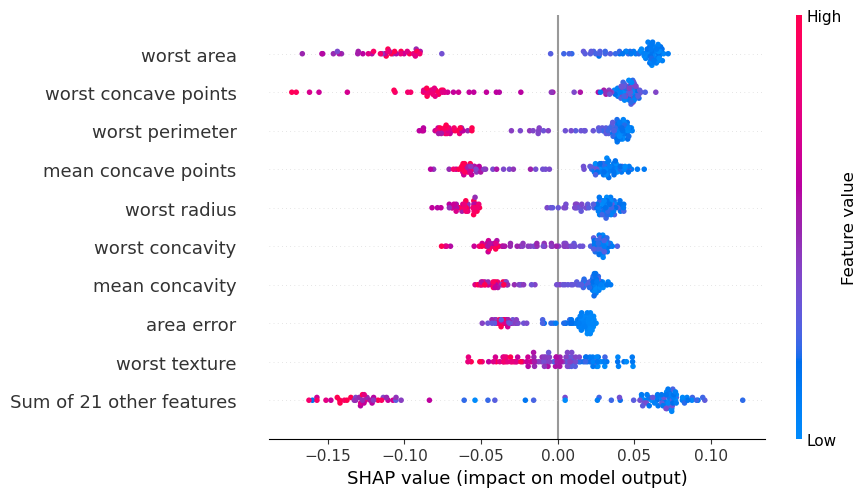

In [74]:

# Gráfico de resumen
shap.plots.beeswarm(shap_values[:,:,1])


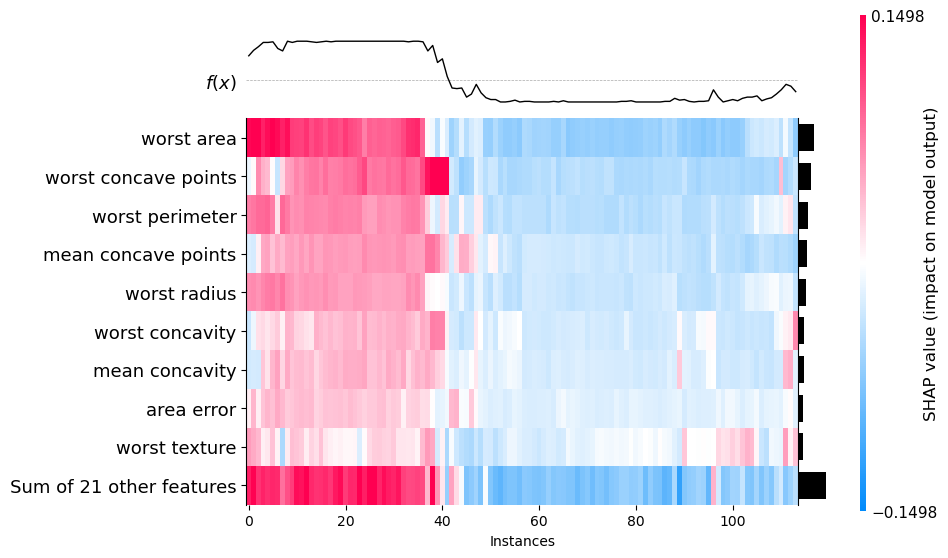

<Axes: xlabel='Instances'>

In [84]:
shap.plots.heatmap(shap_values[:,:,0])

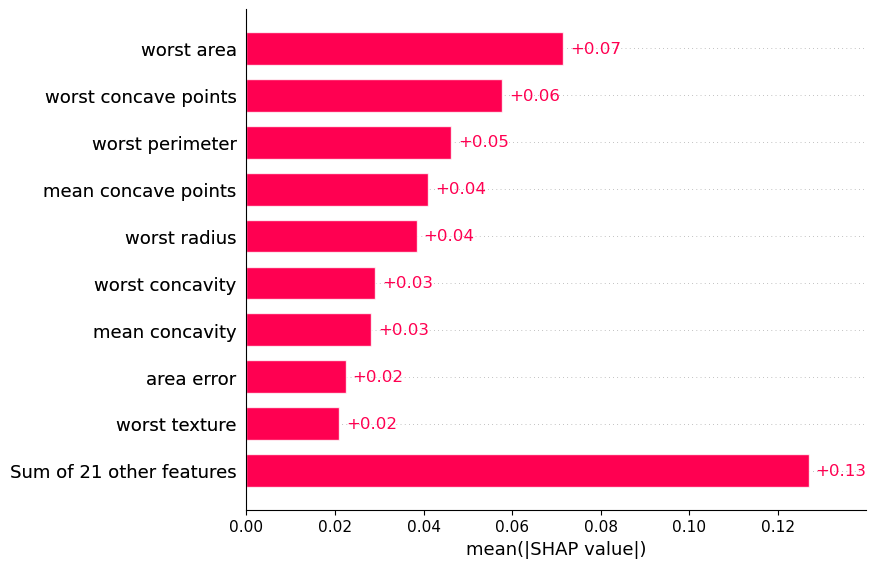

In [88]:
shap.plots.bar(shap_values[:,:,1])


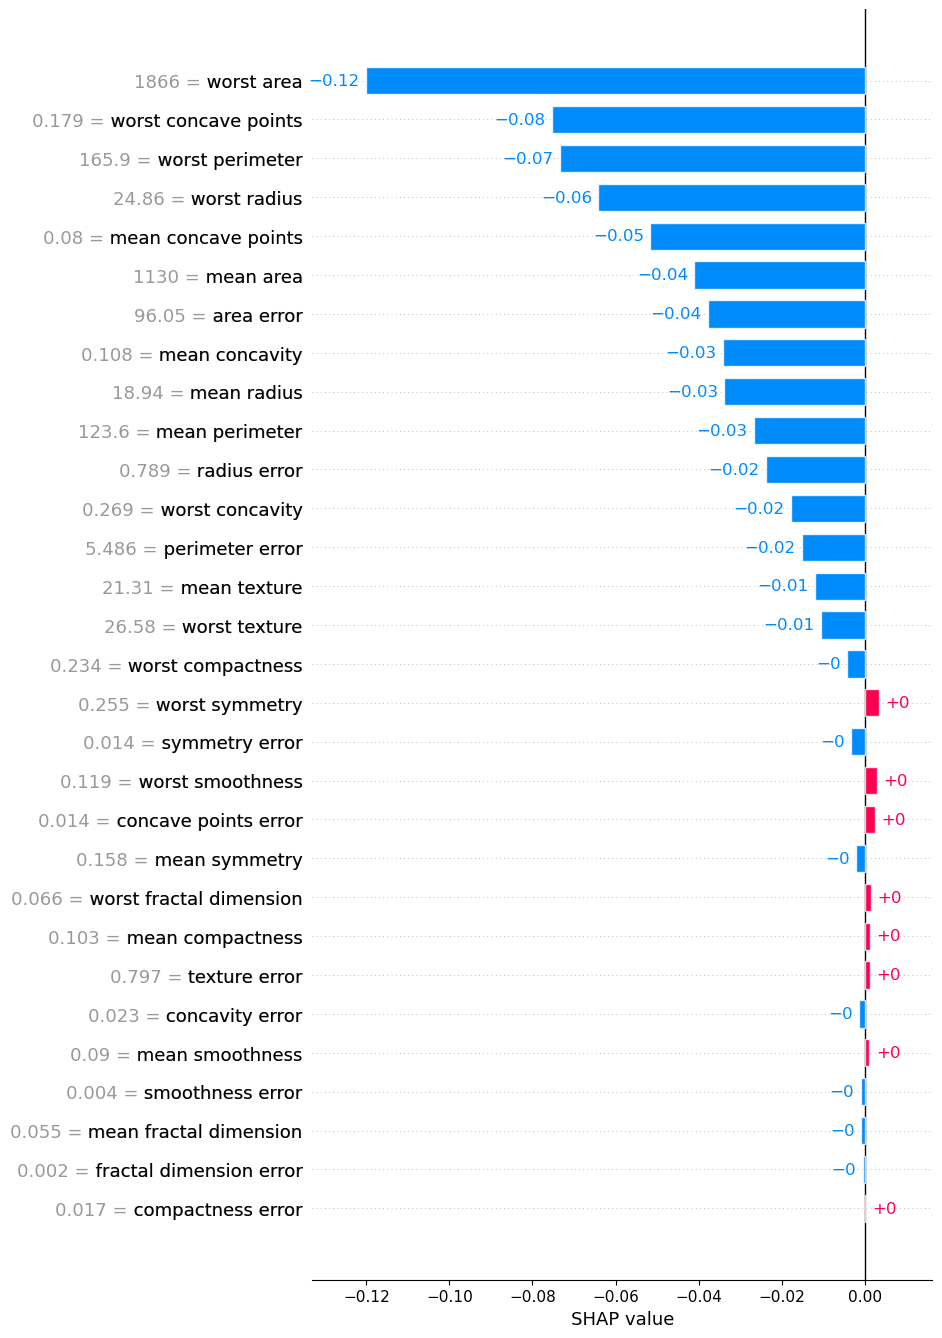

In [100]:
shap.plots.bar(shap_values[1,:,1],max_display=100)


In [86]:
X['worst area'].describe()

count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: worst area, dtype: float64


# Conclusión

- **SHAP** proporciona una interpretación teóricamente justificada de cómo las características afectan las predicciones de un modelo.
- Basado en la teoría de juegos y valores de Shapley, SHAP distribuye la "responsabilidad" de la predicción entre las características de manera justa.
  
## Preguntas para Evaluación y Discusión
1. ¿Por qué es importante la interpretabilidad en los modelos de aprendizaje automático?
2. Explica cómo los valores de Shapley garantizan una distribución justa de las contribuciones.
3. ¿Cuáles son las limitaciones de SHAP y cómo podrían abordarse?
